## AITA: Predictions.

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("aita_latest.csv")

### Bag of Words: 

In [6]:
y = data.verdict.astype(np.int8)

X = data.body

X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

cv = CountVectorizer()

In [178]:
cv.fit(X_tr)
print(len(cv.vocabulary_))
print(cv.get_feature_names()[7000:7050])

143086
['abandoners', 'abandoning', 'abandonment', 'abandonned', 'abandonnent', 'abandonning', 'abandons', 'abaololute', 'abaolutely', 'abaolutle', 'abase', 'abate', 'abated', 'abatement', 'abates', 'abating', 'abaya', 'abaye', 'abb', 'abba', 'abbandon', 'abbandoning', 'abbas', 'abbatoir', 'abbatoirs', 'abberations', 'abberration', 'abbey', 'abbie', 'abbies', 'abbilities', 'abbility', 'abbortions', 'abbot', 'abbotson', 'abbr', 'abbrev', 'abbrevation', 'abbreviate', 'abbreviated', 'abbreviating', 'abbreviation', 'abbreviations', 'abbrevs', 'abbusive', 'abbuusssmejehhehehrh', 'abbv', 'abby', 'abbys', 'abc']


In [ ]:
X_train = cv.transform(X_tr)
X_test = cv.transform(X_te)

### Logistic Regression:

In [74]:
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3)    

(0.699, 0.695)

In [175]:
def visualize_all_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    plt.figure(figsize=(10, 11))
    plt.subplot(1,2,2)
    
    plt.barh(np.arange(n_top_features), coef[positive_coefficients], color="skyblue")
    feature_names = np.array(feature_names)
    plt.yticks(np.arange(0, n_top_features), feature_names[positive_coefficients], size=20, ha="right")
    plt.title("YTA", size=20)
    
    
    
    
    negative_coefficients = np.argsort(coef)[:n_top_features]
    plt.subplot(1,2,1)
    plt.barh(np.arange(n_top_features), -np.flipud(coef[negative_coefficients]), color="palevioletred")
    plt.yticks(np.arange(0, n_top_features), np.flipud(feature_names[negative_coefficients]), size=20, ha="right")
    plt.title("NTA", size=20)
    
    plt.subplots_adjust(wspace = 1)
    plt.show()

### Top features that distinguish YTA from NTA comments:

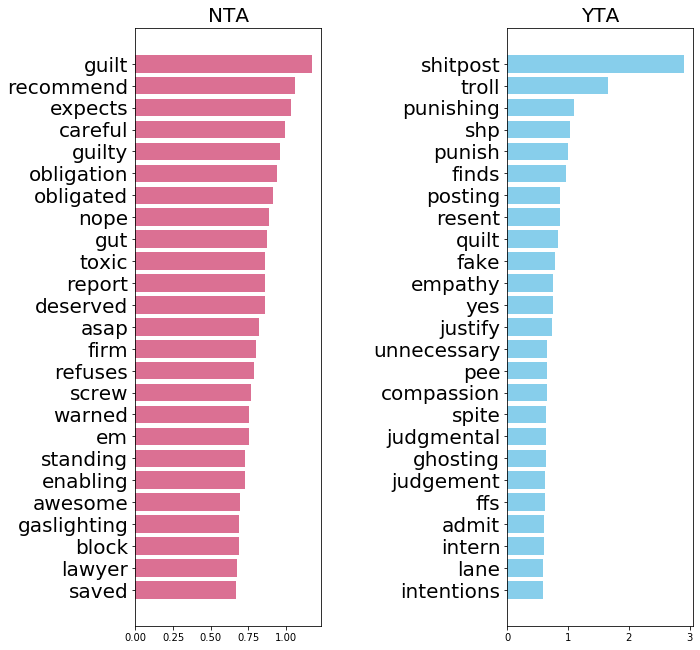

In [176]:
visualize_all_coefficients(logit, cv.get_feature_names())